# Herbiera

Projet de Classification d'un Herbier.

### Contributeurs :
- Julien ASSUIED
- Elie BROSSET
- Lauren DURIVAULT
- Maria Paula ROULET STERKEL

In [1]:
## Global Variables
PATH = 'dataset'

In [2]:
# Étape 0 : Import des Packages
import json
import os

import matplotlib.pyplot as plt

from PIL import Image, ImageOps
import cv2

import pandas as pd
import numpy as np

import tensorflow as tf

2022-12-05 19:34:57.763035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 19:34:57.888598: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/utility/Herbiera/venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-05 19:34:57.888620: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-05 19:34:58.550656: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'

dataset/resized/Test/magnolia/magnolia074.jpg Found
dataset/resized/Test/magnolia/magnolia072.jpg Found
dataset/resized/Test/magnolia/magnolia079.jpg Found
dataset/resized/Test/magnolia/magnolia075.jpg Found
dataset/resized/Test/magnolia/magnolia078.jpg Found
dataset/resized/Test/magnolia/magnolia071.jpg Found
dataset/resized/Test/magnolia/magnolia080.jpg Found
dataset/resized/Test/magnolia/magnolia076.jpg Found
dataset/resized/Test/magnolia/magnolia073.jpg Found
dataset/resized/Test/magnolia/magnolia077.jpg Found
dataset/resized/Test/castanea/castarea080.jpg Found
dataset/resized/Test/castanea/castarea079.jpg Found
dataset/resized/Test/castanea/castarea071.jpg Found
dataset/resized/Test/castanea/castarea074.jpg Found
dataset/resized/Test/castanea/castarea076.jpg Found
dataset/resized/Test/castanea/castarea072.jpg Found
dataset/resized/Test/castanea/castarea075.jpg Found
dataset/resized/Test/castanea/castarea078.jpg Found
dataset/resized/Test/castanea/castarea077.jpg Found
dataset/resi

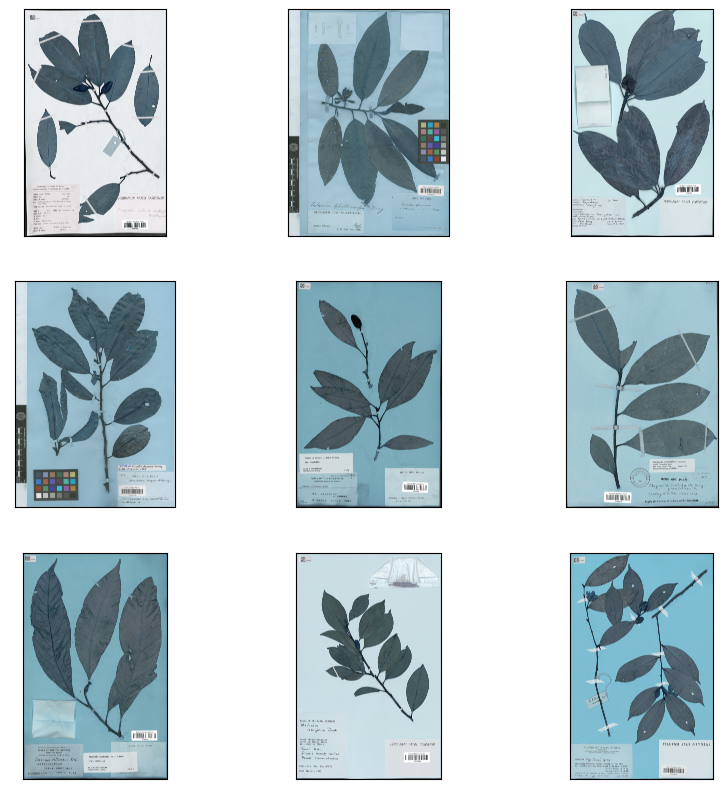

In [3]:
# Étape 1 : Import des données

## Import du fichier de configuration
with open('config.json') as json_data_file:
    config = json.load(json_data_file)

## Import des données
train, test = [], []
for root, dirs, files in os.walk(PATH):
        for file in files:
            if file.endswith(".jpg"):
                if "Train" in root.split('/') and 'resized' not in root.split('/'):
                    train.append(os.path.join(root, file))
                elif "Test" in root.split('/') and 'resized' not in root.split('/'):
                    test.append(os.path.join(root, file))
                else :
                    print(os.path.join(root, file) + ' Found')

## Print des données
print('Train : ' + str(len(train)))
print('Test : ' + str(len(test)))
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.imread(train[i]))


In [4]:
# Étape 2 : Préparation des données

## Loop
for path in [*train, *test]:
    name = path.split('/')[-1]
    folder_list = path.split('/')[:-1]
    folder = '/'.join(folder_list)
    # print("Processing ", name)
    # Load image
    img = Image.open(path)
    # Resize image with PIL Thumbnail
    img.thumbnail((500, 500))
    # Add border
    img = np.array(img)
    height, width, _ = img.shape
    # calculate the difference in height and width
    height_diff = 500 - height
    width_diff = 500 - width
    # add padding to the img
    img = cv2.copyMakeBorder(
        img,
        top=height_diff // 2,
        bottom=height_diff - height_diff // 2,
        left=width_diff // 2,
        right=width_diff - width_diff // 2,
        borderType=cv2.BORDER_REPLICATE,
        value=[0, 0, 0],
    )
    # Save image
    new_folder_path = '/'.join(folder_list[:-2]) + '/resized/' + '/'.join(folder_list[-2:])
    if not os.path.exists(new_folder_path):
        os.makedirs(new_folder_path)
    cv2.imwrite(new_folder_path + '/' + name, img)

In [5]:
# Étape 3 : Création du dataframe d'alimentation
if not os.path.exists('dataframe'):
    os.makedirs('dataframe')

## Liste des images
train_path = []
test_path = []
for root, dirs, files in os.walk('dataset/resized'):
    for file in files:
        if file.endswith(".jpg"):
            if "Train" in root.split('/'):
                train_path.append(os.path.join(root, file))
            elif "Test" in root.split('/'):
                test_path.append(os.path.join(root, file))
            else :
                print(os.path.join(root, file) + ' Found')

## Création du dataframe
train_df = pd.DataFrame({
    'path': train_path,
    'label': [path.split('/')[-2] for path in train_path],
    'bord': [str(config[path.split('/')[-2]]['matrice'][0]) for path in train_path],
    'phyllotaxie': [str(config[path.split('/')[-2]]['matrice'][1]) for path in train_path],
    'type': [str(config[path.split('/')[-2]]['matrice'][2]) for path in train_path],
    'ligneux': [str(config[path.split('/')[-2]]['matrice'][3]) for path in train_path],
    })
test_df = pd.DataFrame({
    'path': test_path,
    'label': [path.split('/')[-2] for path in test_path],
    'bord': [str(config[path.split('/')[-2]]['matrice'][0]) for path in test_path],
    'phyllotaxie': [str(config[path.split('/')[-2]]['matrice'][1]) for path in test_path],
    'type': [str(config[path.split('/')[-2]]['matrice'][2]) for path in test_path],
    'ligneux': [str(config[path.split('/')[-2]]['matrice'][3]) for path in test_path],
    })

## Sauvegarde du dataframe
train_df.to_csv('dataframe/train.csv', index=False)
test_df.to_csv('dataframe/test.csv', index=False)


In [6]:
# Étape 4 : Création du modèle
# object recognition model with the labels from SPECIES
def create_model(output_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),  
        tf.keras.layers.Dense(128, activation="relu"),  
        tf.keras.layers.Dense(32, activation="relu"),  
        tf.keras.layers.Dense(output_size, activation="softmax"),
    ])
    model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    )
    return model


In [7]:
# Étape 5 : Création des générateurs d'image

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

def get_generator(df, generator,x_col, y_col):
    return generator.flow_from_dataframe(
    df,
    x_col=x_col,
    y_col=y_col,
    target_size=(500, 500),
    batch_size=32,
    class_mode="sparse",
    )
## Création des générateurs
train_generator_specie = get_generator(train_df, train_datagen, 'path', 'label')
train_generator_bord = get_generator(train_df, train_datagen, 'path', 'bord')
train_generator_phyllotaxie = get_generator(train_df, train_datagen, 'path', 'phyllotaxie')
train_generator_type = get_generator(train_df, train_datagen, 'path', 'type')
train_generator_ligneux = get_generator(train_df, train_datagen, 'path', 'ligneux')

test_generator_specie = get_generator(test_df, test_datagen, 'path', 'label')
test_generator_bord = get_generator(test_df, test_datagen, 'path', 'bord')
test_generator_phyllotaxie = get_generator(test_df, test_datagen, 'path', 'phyllotaxie')
test_generator_type = get_generator(test_df, test_datagen, 'path', 'type')
test_generator_ligneux = get_generator(test_df, test_datagen, 'path', 'ligneux')


Found 593 validated image filenames belonging to 11 classes.
Found 593 validated image filenames belonging to 2 classes.
Found 593 validated image filenames belonging to 2 classes.
Found 593 validated image filenames belonging to 2 classes.
Found 593 validated image filenames belonging to 2 classes.
Found 220 validated image filenames belonging to 11 classes.
Found 220 validated image filenames belonging to 2 classes.
Found 220 validated image filenames belonging to 2 classes.
Found 220 validated image filenames belonging to 2 classes.
Found 220 validated image filenames belonging to 2 classes.


In [8]:
# Étape 6 : Entrainement du modèle
model_specie = create_model(len(train_generator_specie.class_indices))
model_bord = create_model(len(train_generator_bord.class_indices))
model_phyllotaxie = create_model(len(train_generator_phyllotaxie.class_indices))
model_type = create_model(len(train_generator_type.class_indices))
model_ligneux = create_model(len(train_generator_ligneux.class_indices))

model_specie.fit(
    train_generator_specie,
    epochs=10,
    validation_data=test_generator_specie,
)

model_bord.fit(
    train_generator_bord,
    epochs=10,
    validation_data=test_generator_bord,
)

model_phyllotaxie.fit(
    train_generator_phyllotaxie,
    epochs=10,
    validation_data=test_generator_phyllotaxie,
)

model_type.fit(
    train_generator_type,
    epochs=10,
    validation_data=test_generator_type,
)

model_ligneux.fit(
    train_generator_ligneux,
    epochs=10,
    validation_data=test_generator_ligneux,
)

2022-12-05 19:35:39.233321: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-05 19:35:39.233529: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/utility/Herbiera/venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-05 19:35:39.233581: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/utility/Herbiera/venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-05 19:35:39.233627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.

Epoch 1/20


2022-12-05 19:35:43.697390: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1015824384 exceeds 10% of free system memory.
2022-12-05 19:35:48.640988: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1015824384 exceeds 10% of free system memory.


 1/19 [>.............................] - ETA: 2:42 - loss: 2.4080 - accuracy: 0.0000e+00

2022-12-05 19:35:50.010675: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1015824384 exceeds 10% of free system memory.
2022-12-05 19:35:55.364090: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1015824384 exceeds 10% of free system memory.


 2/19 [==>...........................] - ETA: 1:55 - loss: 1.6047 - accuracy: 0.3594    

2022-12-05 19:35:56.797884: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1015824384 exceeds 10% of free system memory.


 4/19 [=====>........................] - ETA: 1:39 - loss: 1.1435 - accuracy: 0.5391

KeyboardInterrupt: 